## Installing and importing all the required libraries

In [1]:
pip install torch

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install huggingface-cli 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement huggingface-cli (from versions: none)
ERROR: No matching distribution found for huggingface-cli

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

pip install TwitterAPI

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from textblob import TextBlob
import tweepy
from TwitterAPI import TwitterAPI
from dotenv import load_dotenv, dotenv_values
import os
import re
import tweepy
import requests
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
config = dotenv_values('.env')
config = dict(config)
# config

In [8]:
api_key = config['APIKEY']
api_secrets = config['APIKEYSECRET']
bearer_token = config['BEARERTOKEN']
access_token = config['ACCESSTOKEN']
access_token_secret = config['ACCESSTOKENSECRET']
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('-------------------------\nSuccessful Authentication\n-------------------------')
except:
    print('-------------------------\nFailed authentication\n-------------------------')

-------------------------
Successful Authentication
-------------------------


In [9]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split())

In [10]:
def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [12]:
def get_tweets(query):
    tweets_final=[]
    tweets=api.search_tweets(q=query,count=10000000)
    # print(r.status_code)
    for tweet in tweets:
        parsed_tweet = {}
        parsed_tweet['text'] = tweet.text
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text)
        if tweet.retweet_count > 0:
            if parsed_tweet not in tweets:
                tweets_final.append(parsed_tweet)
        else:
            tweets_final.append(parsed_tweet)    
    return tweets_final

(#MondayMotivation) lang:en
Positive tweets percentage: 70.0 %
Negative tweets percentage: 3.0 %
Neutral tweets percentage: 27.0 %


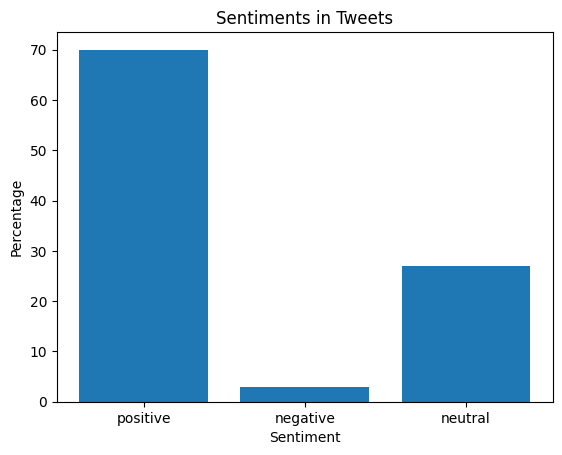

(covid) lang:en
Positive tweets percentage: 42.0 %
Negative tweets percentage: 27.0 %
Neutral tweets percentage: 31.0 %


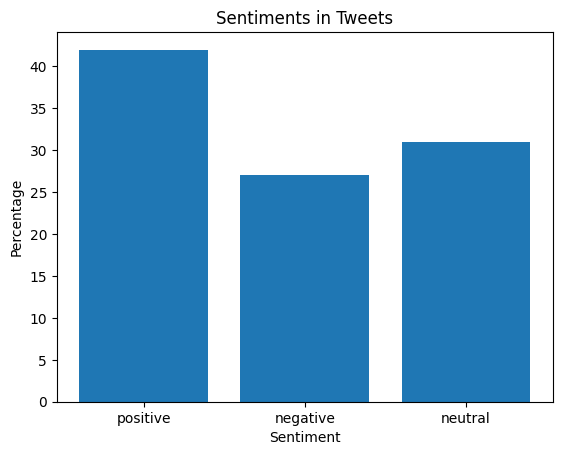

(nike) lang:en
Positive tweets percentage: 47.474747474747474 %
Negative tweets percentage: 20.2020202020202 %
Neutral tweets percentage: 32.323232323232325 %


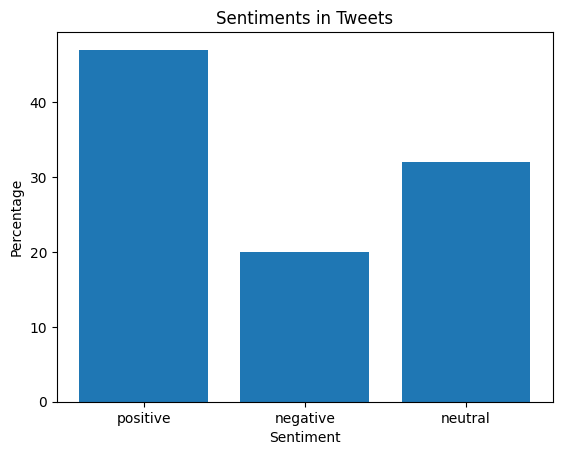

In [14]:
queries = ['(#MondayMotivation) lang:en', '(covid) lang:en','(nike) lang:en']
#this way we can search for hastags, popular topics, brands and much more topics
labels = ['positive', 'negative', 'neutral']
import matplotlib.pyplot as plt
for q in queries:
    tweets = get_tweets(q)
    # print(tweets)
    print(q)
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - (len(ntweets)+len(ptweets)))/len(tweets)))
    values = [round(100*len(ptweets)/len(tweets)), round(100*len(ntweets)/len(tweets)), round(100*(len(tweets) - (len(ntweets)+len(ptweets)))/len(tweets))]
    plt.bar(labels, values)
    plt.title("Sentiments in Tweets")
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.show()


